<a href="https://colab.research.google.com/github/awnialnammari/6220-Final/blob/main/6220_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

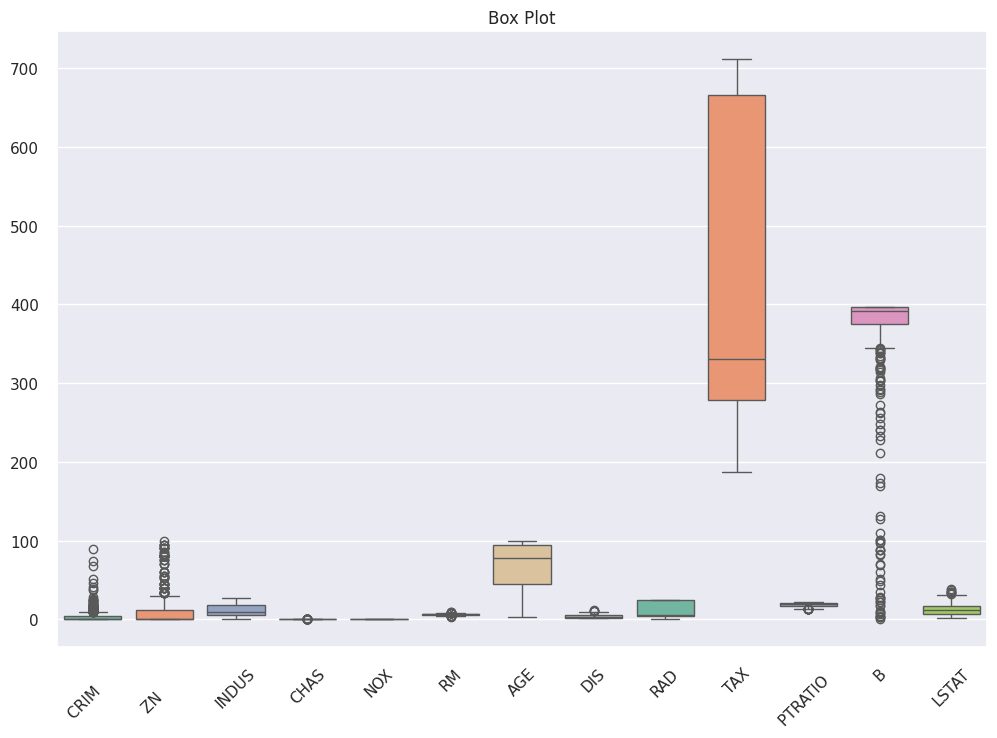

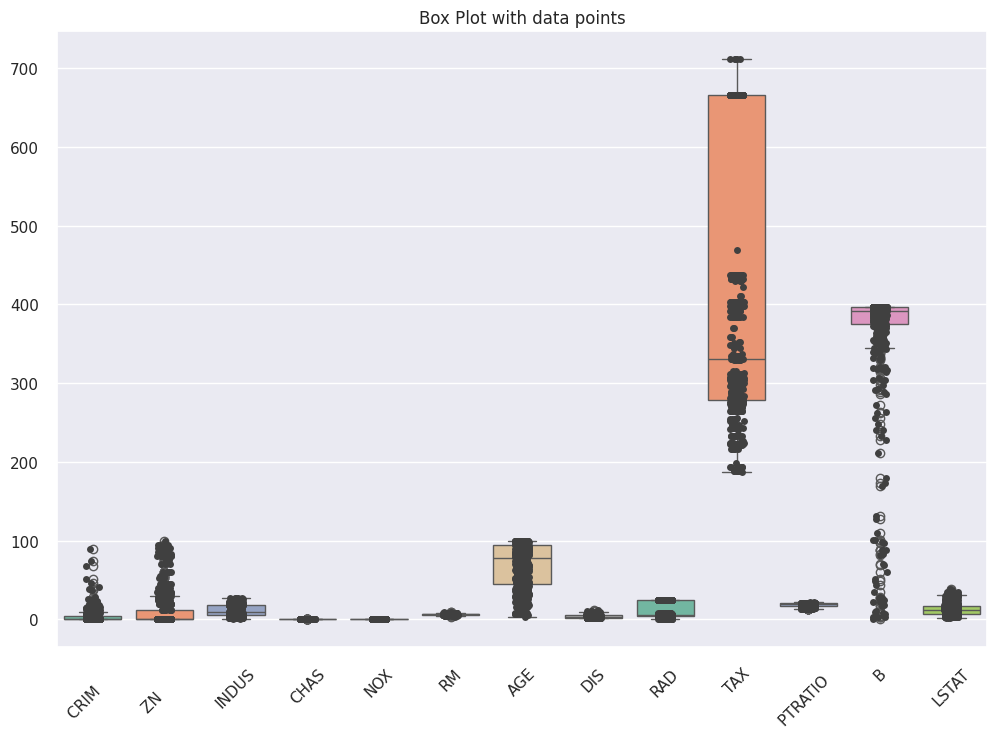

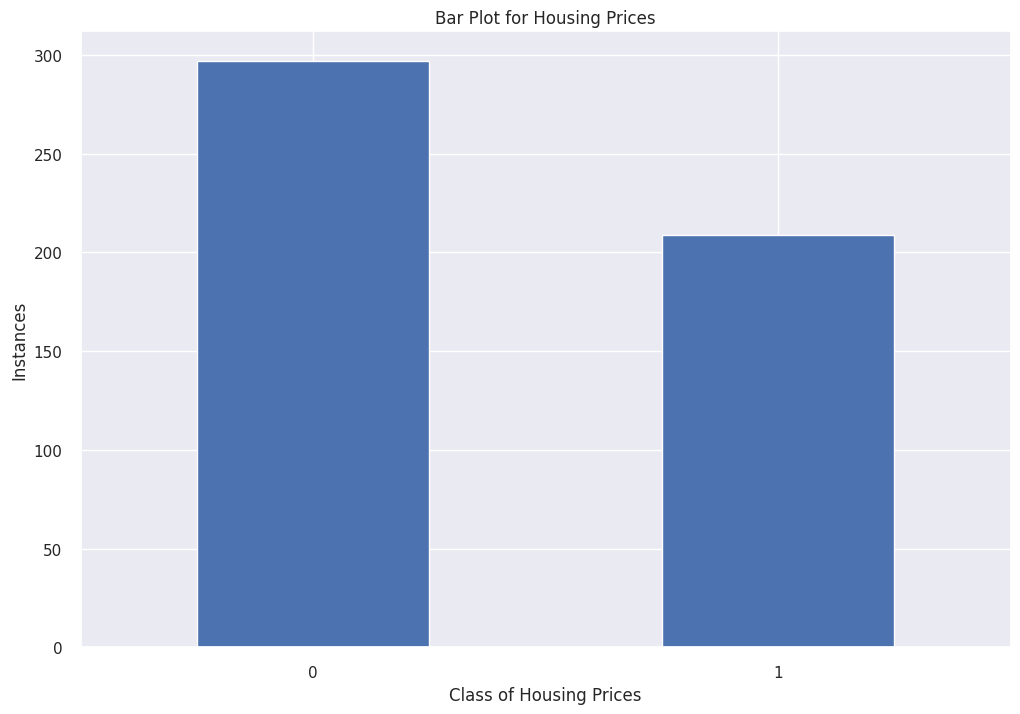

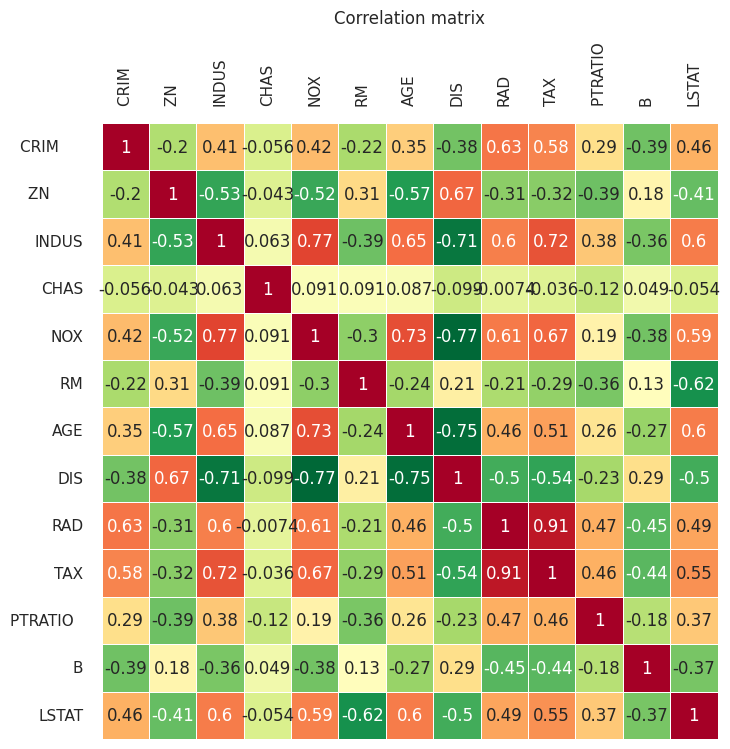

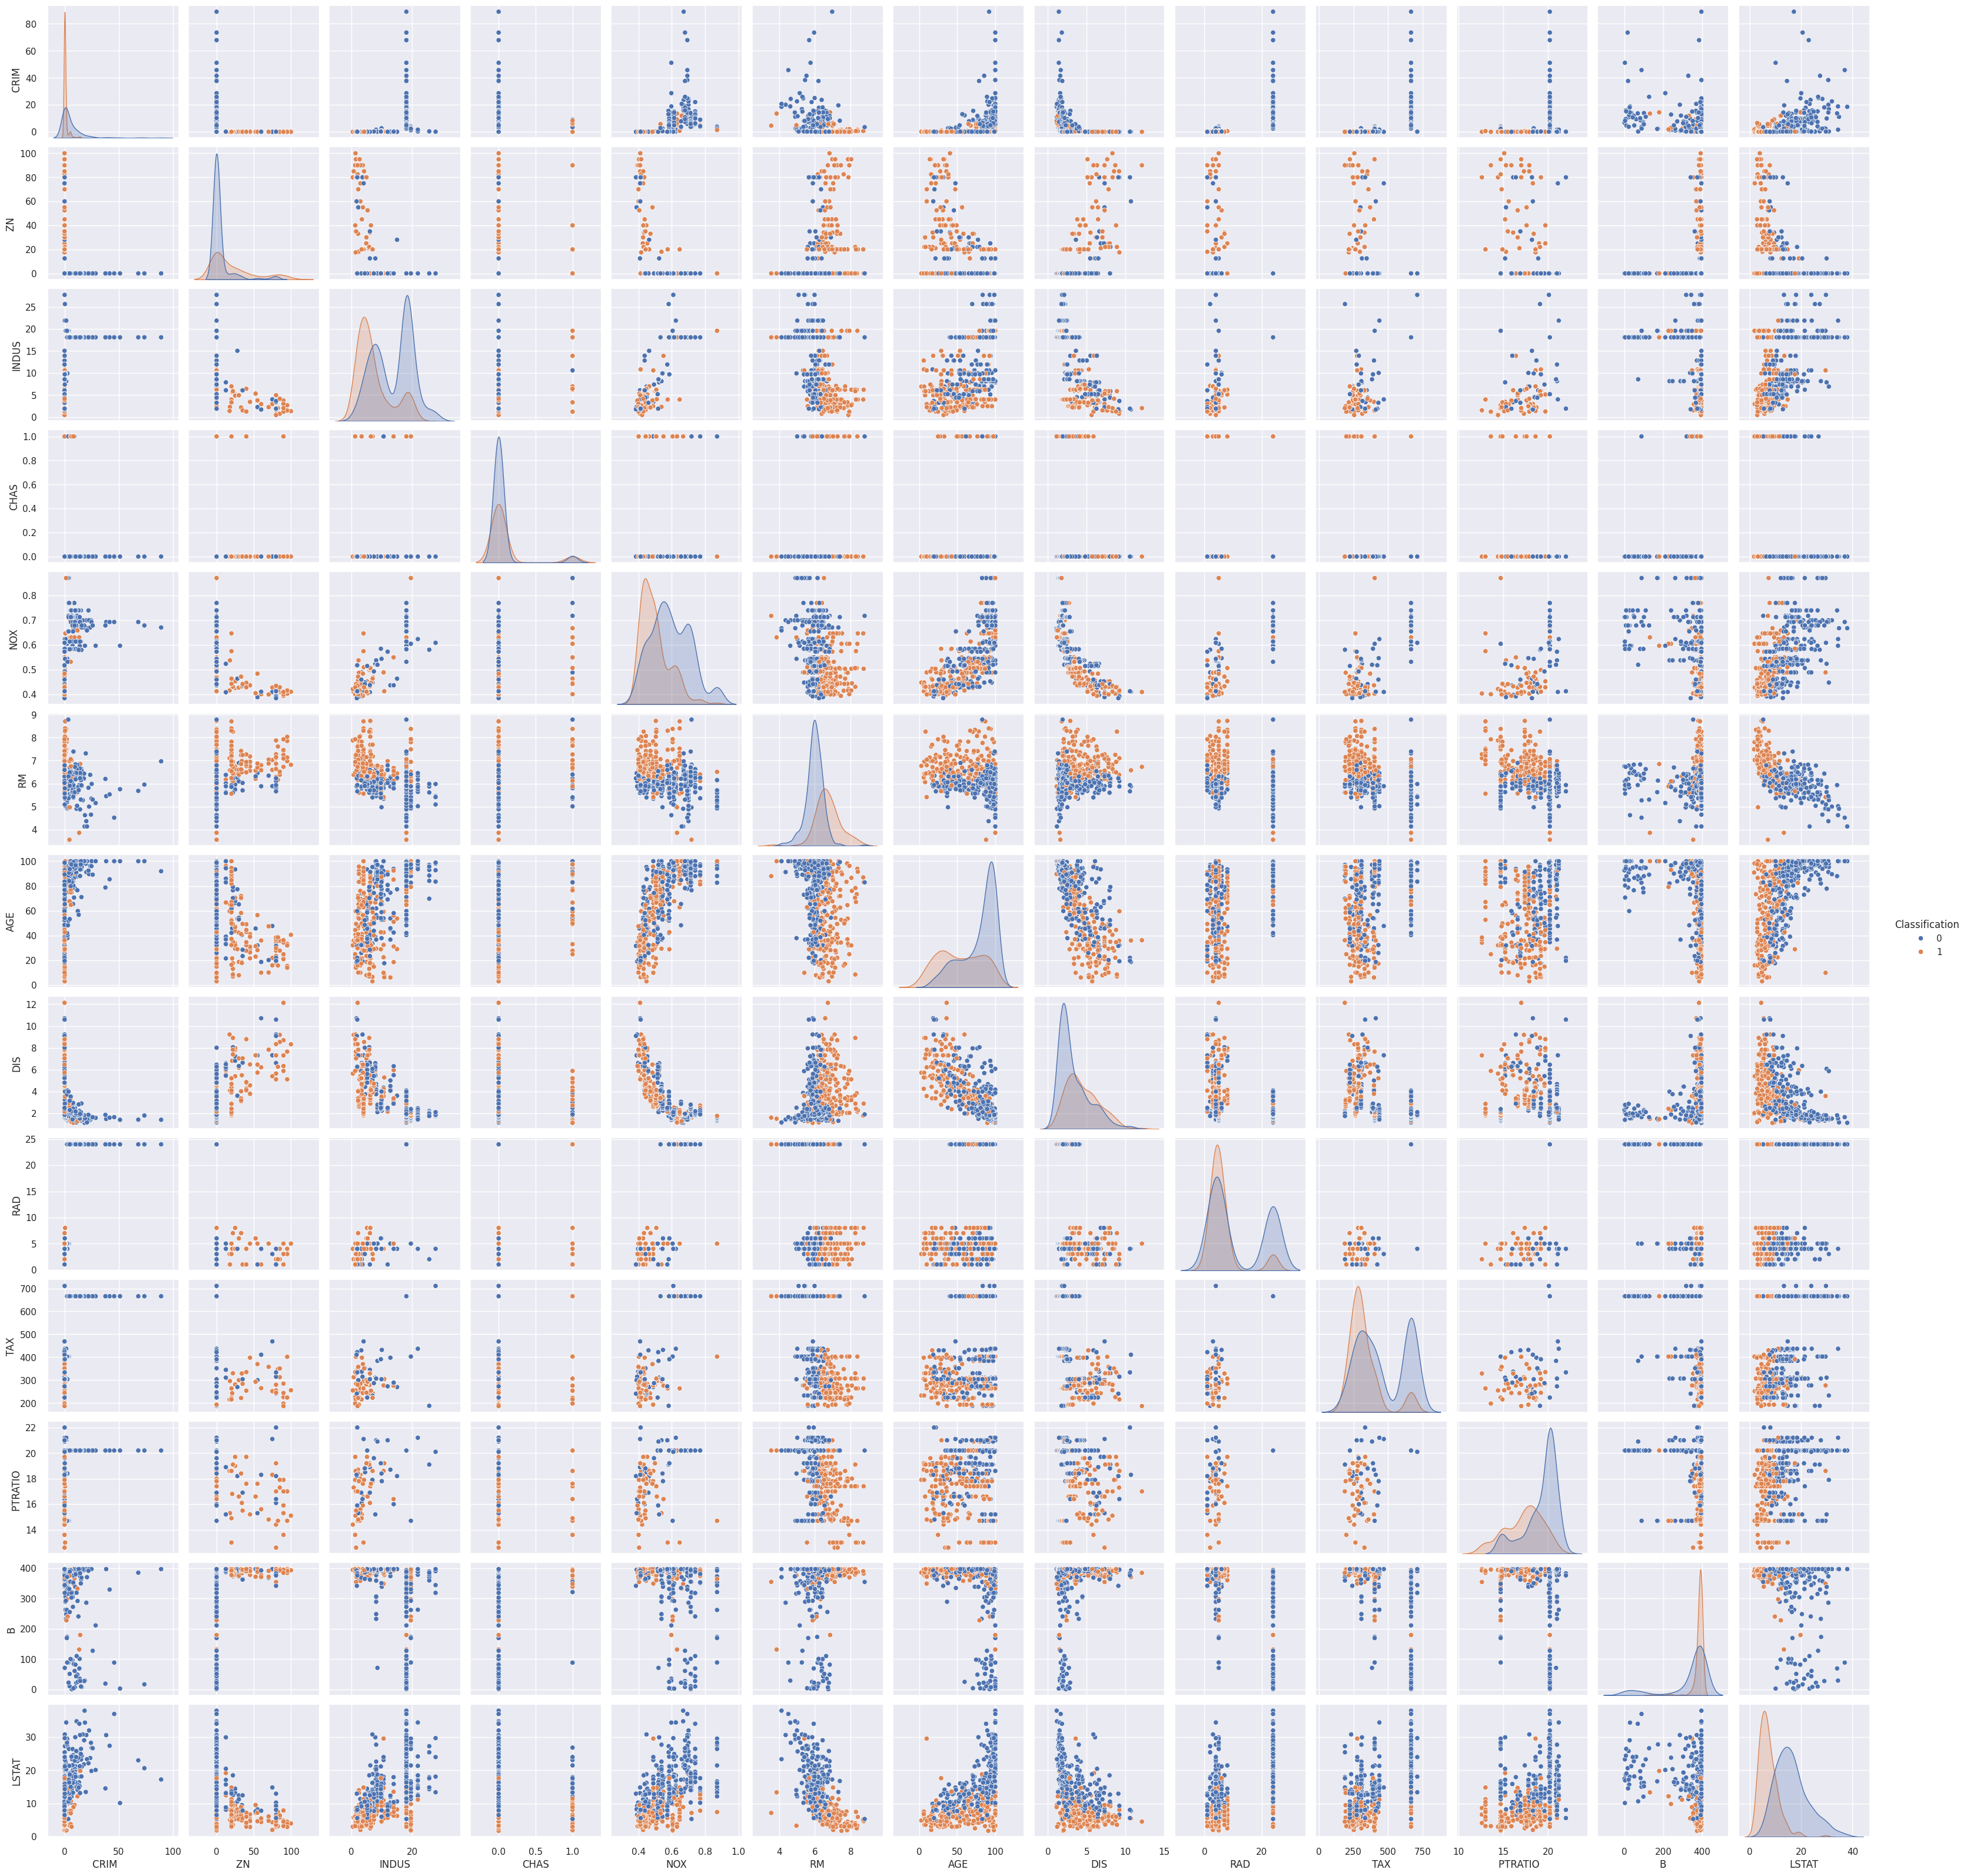

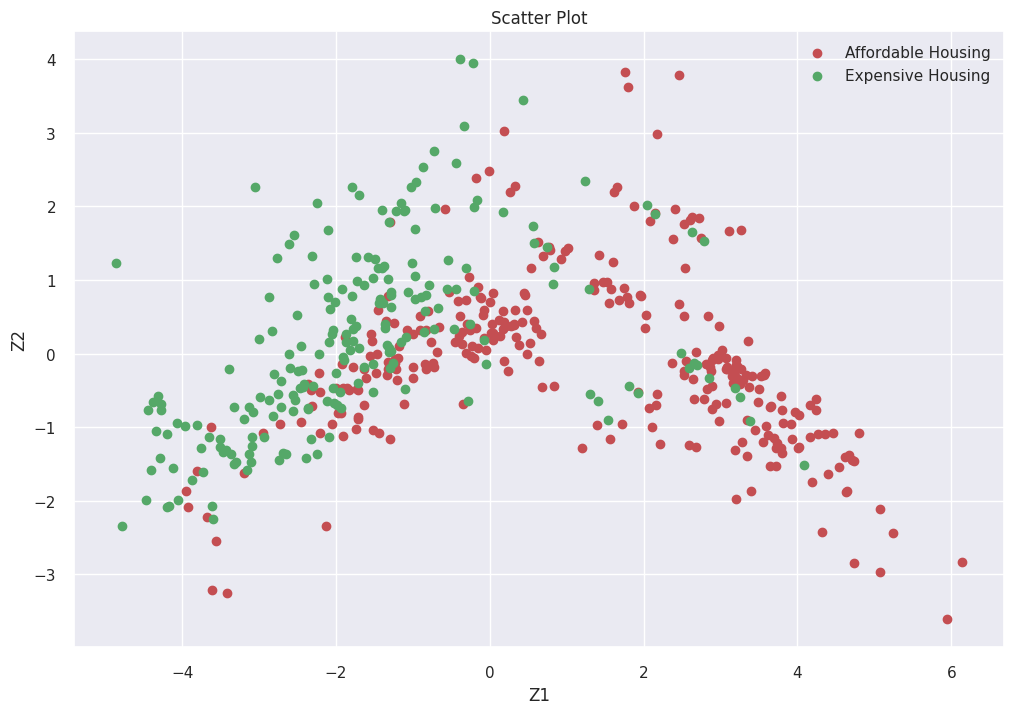

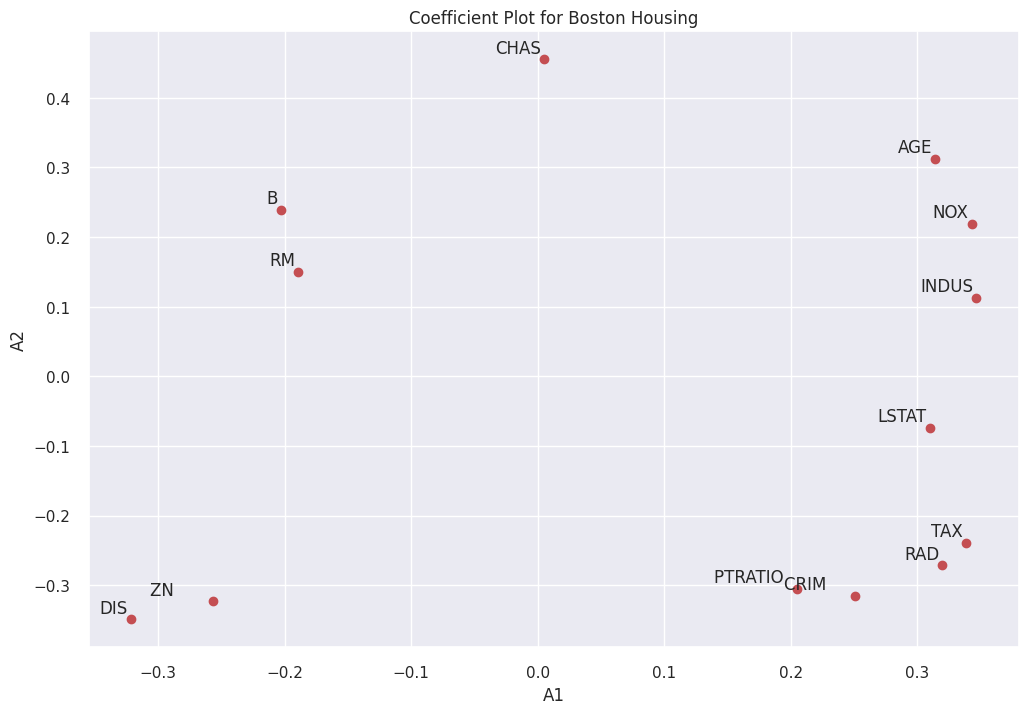

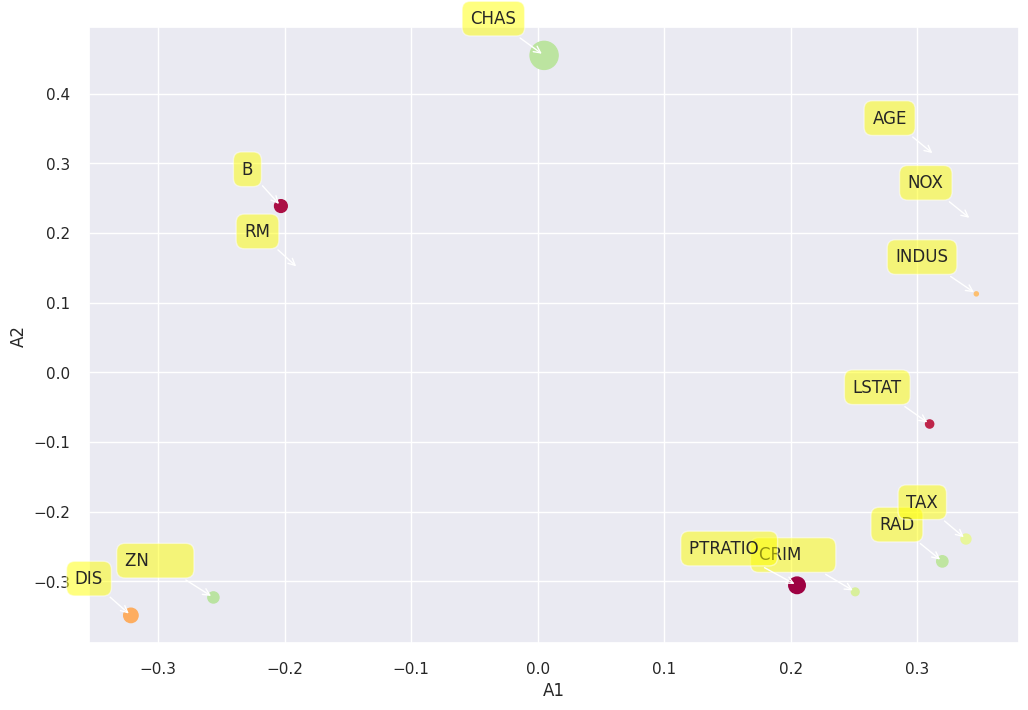

[6.1389812  1.43611329 1.2450773  0.85927328 0.83646904 0.65870897
 0.5364162  0.39688167 0.27749173 0.22067394 0.18638271 0.16963823
 0.06363502]
[[ 0.2509514  -0.31525237  0.24656649  0.06177071  0.08215692 -0.21965961
   0.77760721  0.15335048  0.26039028  0.01936913 -0.10964435  0.08676107
   0.0459523 ]
 [-0.25631454 -0.3233129   0.29585782  0.12871159  0.32061699 -0.3233881
  -0.27499628 -0.40268031  0.35813749  0.26752723  0.26275629 -0.07142528
  -0.08091897]
 [ 0.34667207  0.11249291 -0.01594592  0.01714571 -0.00781119 -0.0761379
  -0.33957645  0.17393172  0.64441615 -0.36353226 -0.30316943 -0.11319963
  -0.25107654]
 [ 0.00504243  0.45482914  0.28978082  0.81594136  0.08653094  0.16749014
   0.07413621 -0.02466215 -0.01372777 -0.00618184  0.01392667 -0.00398268
   0.03592171]
 [ 0.34285231  0.21911553  0.12096411 -0.12822614  0.13685356 -0.15298267
  -0.19963484  0.08012056 -0.01852201  0.23105645  0.11131888  0.80432257
   0.04363045]
 [-0.18924257  0.14933154  0.59396117 -0

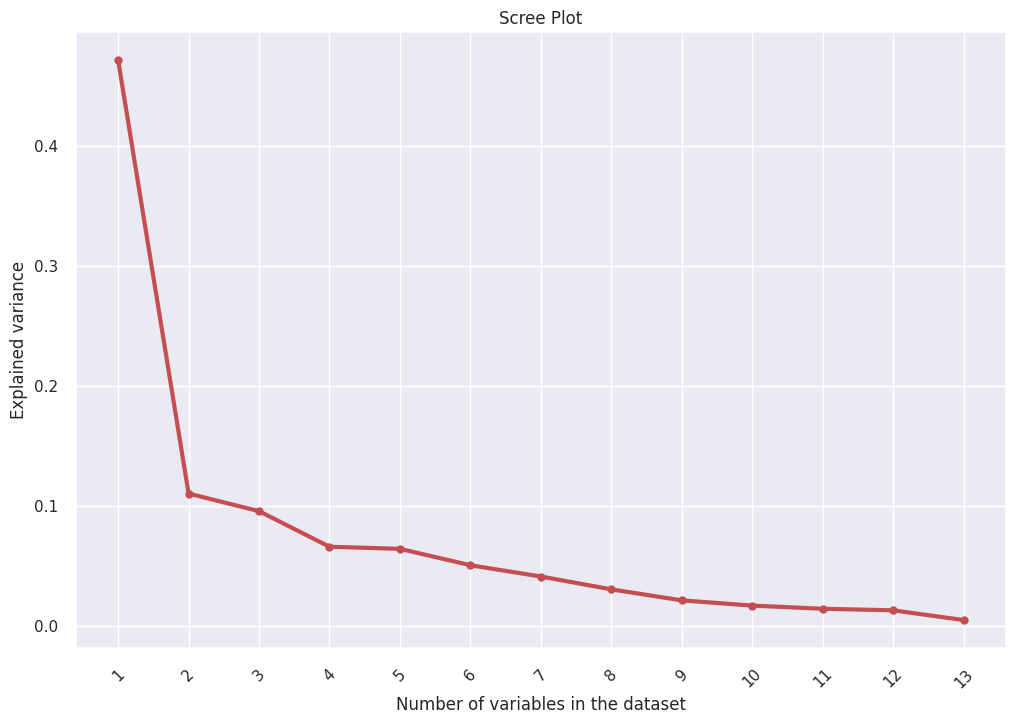

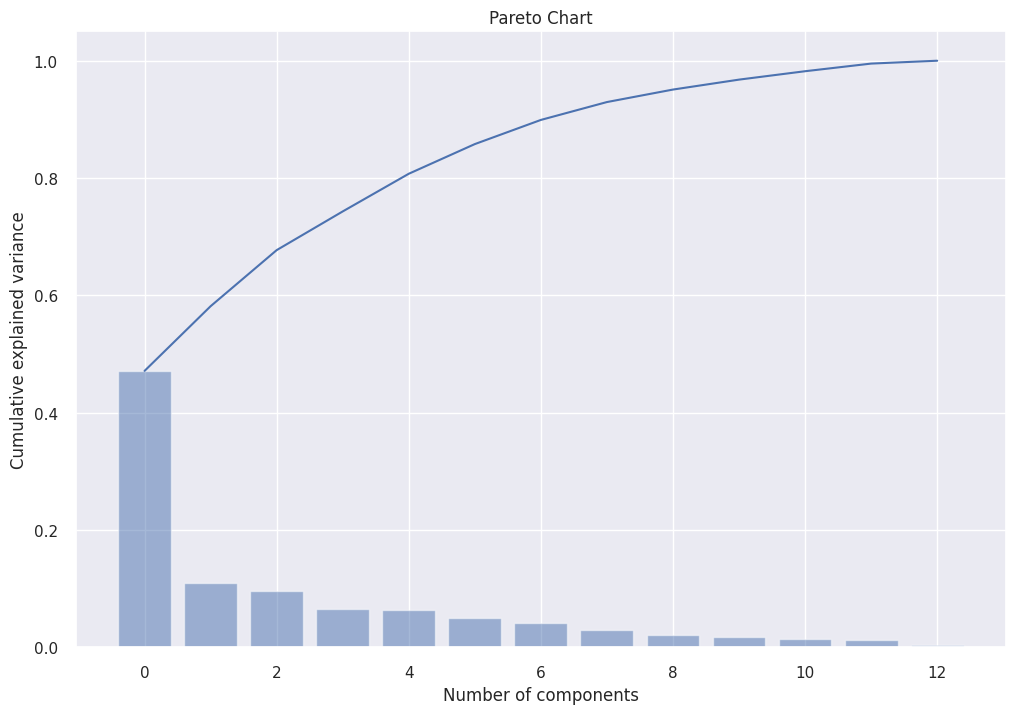

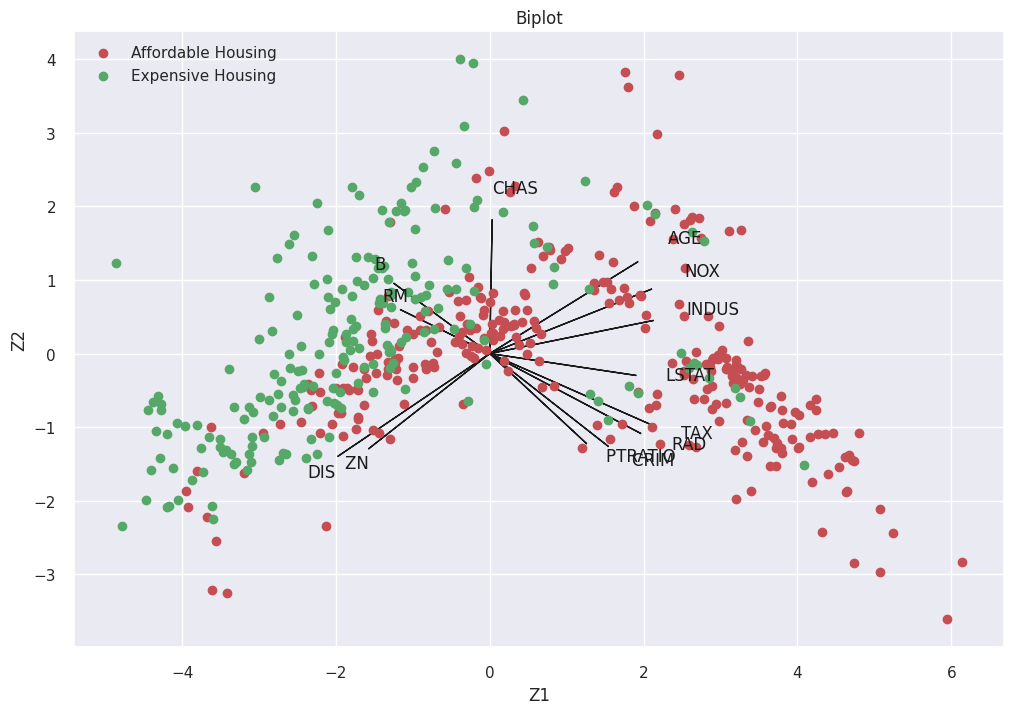

Data for Modeling: (455, 15)
Unseen Data For Predictions: (51, 15)


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

This is the table before applying PCA


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

This is the table after applying PCA


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

This is LR tuned model


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

This is KNN tuned model


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

This is rf tuned model


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

This is et tuned model


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

RF Table after


In [5]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


#read file data
data_energy = pd.read_csv("/content/Housing.csv", encoding="utf-8")

#Box plots
data_energy_box_plot = data_energy.iloc[:,0:13]
box_plot_energy = plt.figure()
box_plot_energy = sns.boxplot(data=data_energy_box_plot, orient="v", palette="Set2")
box_plot_energy.set_xticklabels(box_plot_energy.get_xticklabels(), rotation=45);
plt.title('Box Plot')
box_plot_energy = plt.figure()
box_plot_energy = sns.boxplot(data=data_energy_box_plot, orient="v", palette="Set2")
box_plot_energy = sns.stripplot(data=data_energy_box_plot, color=".25")
box_plot_energy.set_xticklabels(box_plot_energy.get_xticklabels(), rotation=45);
plt.title('Box Plot with data points')
plt.show()

#Bar Chart
#Count Bar Chart
y = data_energy['Classification']
target = data_energy['Classification'].to_numpy()
X = data_energy.iloc[:, 0:13]
X.describe().transpose()
X_st = StandardScaler().fit_transform(X)
data_combine = pd.DataFrame(X_st)
data_combine.columns = X.columns
data_combine.describe().transpose()
observations = list(data_combine.index)
variables = list(data_combine.columns)
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class of Housing Prices')
plt.ylabel('Instances')
plt.title('Bar Plot for Housing Prices')
plt.show()

#Correlation Matrix
#The following snippet of code calculates the adjusted data by subtracting the mean from each column
data_covariance_combine_adjusted = data_combine - data_combine.mean()
covariance_matrix_combined = sns.heatmap(data_covariance_combine_adjusted.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
covariance_matrix_combined.tick_params(labelbottom=False,labeltop=True)
covariance_matrix_combined.set_xticklabels(covariance_matrix_combined.get_xticklabels(),rotation=90);
plt.title('Correlation matrix')
plt.show()


#Pair plot
data_energy_without_MEDV = data_energy.drop(columns=['MEDV'])

sns.pairplot(data_energy_without_MEDV, hue='Classification')
plt.show()

#sns.pairplot(data_energy,hue='Classification')

#plt.show()

#Scatter Plot
#The following block of code includes the PCA Analysis
pca_data = PCA()
pca_data.fit(data_combine)
Z = pca_data.fit_transform(data_combine)

# 1(Expensive Housing)->0,  2(Affordable Housing)->1
index_less = np.where(y == 0)
index_more = np.where(y == 1)

plt. figure()
plt.scatter(Z[index_less,0], Z[index_less,1], c='r', label='Affordable Housing')
plt.scatter(Z[index_more,0], Z[index_more,1], c='g', label='Expensive Housing')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.title('Scatter Plot')
plt.show()


#Coefficient Plot
A_matrix = pca_data.components_.T
plt.figure()
plt.scatter(A_matrix[:,0],A_matrix[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A_matrix[:, 0], A_matrix[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
plt.title('Coefficient Plot for Boston Housing')
plt.show()

#Eigen Vector Plot
plt.figure()
plt.scatter(A_matrix[:, 0],A_matrix[:, 1], marker='o', c=A_matrix[:, 2], s=A_matrix[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A_matrix[:, 0],A_matrix[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()


#Eigenvalues
eigenvalues = pca_data.explained_variance_
print(eigenvalues)
print(A_matrix)
#Scree plot
plt. figure()
x = np.arange(len(eigenvalues)) + 1
plt.plot(x,eigenvalues/sum(eigenvalues), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=45)
plt.xlabel('Number of variables in the dataset')
plt.ylabel('Explained variance')
plt.title("Scree Plot")
plt.show()

#Pareto Analysis
#Calculating the varaince ratio for each component stored in PCA
variation_proportion = pca_data.explained_variance_ratio_
plt.figure()
index_bar_plot = np.arange(len(variation_proportion))
plt.bar(index_bar_plot, variation_proportion, align='center', alpha=0.5)
plt.plot(np.cumsum(variation_proportion))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Pareto Chart')
plt.show()

#The following block of code plots a biplot
#Change Variables
A1 = A_matrix[:,0]
A2 = A_matrix[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[index_less,0], Z[index_less,1], c='r', label='Affordable Housing')
plt.scatter(Z[index_more,0], Z[index_more,1], c='g', label='Expensive Housing')
plt.legend(loc='upper left')
plt.title('Biplot')
plt.show()

#Vector Plot
plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
plt.title('Eigen Vectors for Z1 and Z2')

#############################
#Compare Model

data_energy = pd.read_csv("/content/Housing.csv", encoding="utf-8")
y = data_energy['Classification']
target = data_energy['Classification'].to_numpy()

pca_data = PCA()
pca_data.fit(data_energy)
Z = pca_data.fit_transform(data_energy)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

!pip install shap
!pip install pycaret

from pycaret.utils import version
version()
data = pd.read_csv("/content/Housing.csv", encoding="utf-8")
df = data

data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

from pycaret.classification import *
clf = setup(data=data, target='Classification', train_size=0.7, session_id=123)

best_model = compare_models()
print('This is the table before applying PCA')


!pip install statsmodels --upgrade
clf_pca = setup(data=data, target='Classification', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 4)
best_model_pca = compare_models()
print('This is the table after applying PCA')
best_model_pca
tuned_best_model_pca = tune_model(best_model_pca)
evaluate_model(tuned_best_model_pca)


#This is for tuned models
lr_pca = create_model('lr')
tuned_lr_pca = tune_model(lr_pca)
evaluate_model(tuned_lr_pca)
print('This is LR tuned model')

knn_pca = create_model('knn')
tuned_knn_pca = tune_model(knn_pca)
evaluate_model(tuned_knn_pca)
print('This is KNN tuned model')

rf_pca = create_model('rf')
tuned_rf_pca = tune_model(rf_pca)
evaluate_model(tuned_rf_pca)
print('This is rf tuned model')

et_pca = create_model('et')
tuned_et_pca = tune_model(et_pca)
evaluate_model(tuned_et_pca)
print('This is et tuned model')

rf_pca = create_model('rf')
tuned_rf_pca = tune_model(rf_pca)
evaluate_model(tuned_rf_pca)
print('RF Table after')
